In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [20]:
customer_features = pd.read_csv("../data/processed/customer_features.csv")
customer_features.head()


,user_id,frequency,monetary,view_count,cart_count,purchase_count,unique_products,unique_categories,unique_brands,recency_days,purchase_ratio,cart_to_purchase_ratio
0,104655840,1,9.91,1,0,0,1,1,1,0,0.0,0.0
1,128968633,18,3515.87,18,0,0,18,3,5,0,0.0,0.0
2,176250879,3,1262.40,3,0,0,3,1,1,0,0.0,0.0
3,178539771,1,566.27,1,0,0,1,1,1,0,0.0,0.0
4,208005640,4,1124.23,4,0,0,4,1,3,0,0.0,0.0


In [21]:
customer_features.shape


(146441, 12)

In [22]:
customer_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146441 entries, 0 to 146440
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 146441 non-null  int64  
 1   frequency               146441 non-null  int64  
 2   monetary                146441 non-null  float64
 3   view_count              146441 non-null  int64  
 4   cart_count              146441 non-null  int64  
 5   purchase_count          146441 non-null  int64  
 6   unique_products         146441 non-null  int64  
 7   unique_categories       146441 non-null  int64  
 8   unique_brands           146441 non-null  int64  
 9   recency_days            146441 non-null  int64  
 10  purchase_ratio          146441 non-null  float64
 11  cart_to_purchase_ratio  146441 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 13.4 MB


In [23]:
customer_features_clustering = customer_features.drop(columns=['user_id'])


In [24]:
customer_features_clustering.columns


Index(['frequency', 'monetary', 'view_count', 'cart_count', 'purchase_count',
       'unique_products', 'unique_categories', 'unique_brands', 'recency_days',
       'purchase_ratio', 'cart_to_purchase_ratio'],
      dtype='object')

In [25]:
import numpy as np

skewed_cols = [
    'frequency',
    'monetary',
    'view_count',
    'cart_count',
    'purchase_count',
    'unique_products',
    'unique_categories',
    'unique_brands'
]

customer_features_clustering[skewed_cols] = np.log1p(
    customer_features_clustering[skewed_cols]
)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_features_clustering)


In [27]:
import pandas as pd

X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=customer_features_clustering.columns
)

X_scaled_df.describe().T[['mean', 'std']]


,mean,std
frequency,3.353754e-16,1.000003
monetary,-1.242131e-17,1.000003
view_count,3.167435e-16,1.000003
cart_count,1.024758e-16,1.000003
purchase_count,-5.434324e-18,1.000003
unique_products,1.676877e-16,1.000003
unique_categories,-3.105328e-18,1.000003
unique_brands,1.738984e-16,1.000003
recency_days,0.000000e+00,0.000000
purchase_ratio,-1.195551e-16,1.000003


In [28]:
import numpy as np

np.save("../data/processed/X_scaled.npy", X_scaled)


In [29]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


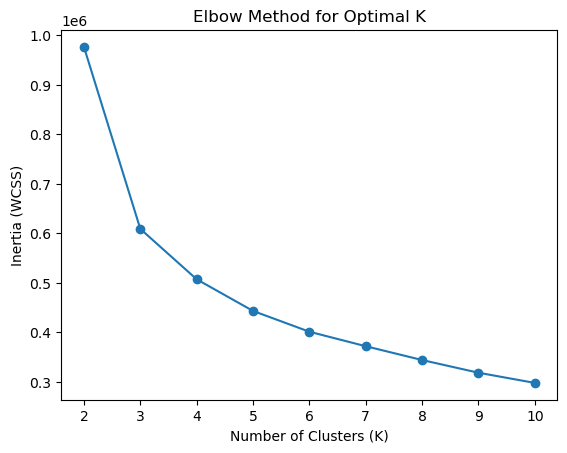

In [30]:
plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [31]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)


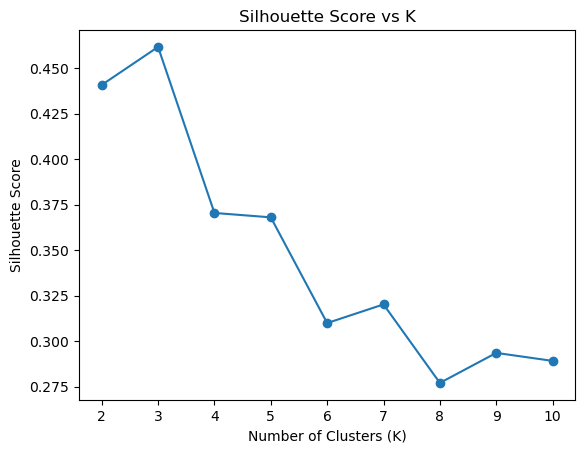

In [32]:
plt.figure()
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.show()


In [33]:
evaluation_df = pd.DataFrame({
    "K": list(K_range),
    "Inertia": inertia,
    "Silhouette_Score": silhouette_scores
})

evaluation_df


,K,Inertia,Silhouette_Score
0,2,976618.731757,0.440830
1,3,608942.295935,0.461742
2,4,507137.991537,0.370446
3,5,443178.457816,0.368033
4,6,401188.625989,0.309902
5,7,371903.858959,0.320165
6,8,343994.802130,0.276990
7,9,318348.465961,0.293499
8,10,297766.041876,0.289108


In [34]:
evaluation_df.to_csv(
    "../reports/cluster_evaluation_metrics.csv",
    index=False
)


In [35]:
from sklearn.cluster import KMeans

FINAL_K = 4  # change if needed

kmeans_final = KMeans(
    n_clusters=FINAL_K,
    random_state=42,
    n_init=10
)

cluster_labels = kmeans_final.fit_predict(X_scaled)


In [36]:
customer_features['cluster'] = cluster_labels
customer_features.head()


,user_id,frequency,monetary,view_count,cart_count,purchase_count,unique_products,unique_categories,unique_brands,recency_days,purchase_ratio,cart_to_purchase_ratio,cluster
0,104655840,1,9.91,1,0,0,1,1,1,0,0.0,0.0,3
1,128968633,18,3515.87,18,0,0,18,3,5,0,0.0,0.0,2
2,176250879,3,1262.40,3,0,0,3,1,1,0,0.0,0.0,0
3,178539771,1,566.27,1,0,0,1,1,1,0,0.0,0.0,3
4,208005640,4,1124.23,4,0,0,4,1,3,0,0.0,0.0,0


In [37]:
customer_features['cluster'].value_counts().sort_index()


cluster
0    44470
1    13591
2    17076
3    71304
Name: count, dtype: int64

In [39]:
customer_features.to_csv(
    "../data/processed/customer_clusters.csv",
    index=False
)


In [40]:
cluster_summary = customer_features.groupby('cluster').mean()
cluster_summary


,user_id,frequency,monetary,view_count,cart_count,purchase_count,unique_products,unique_categories,unique_brands,recency_days,purchase_ratio,cart_to_purchase_ratio
cluster,,,,,,,,,,,,
0,5.737364e+08,6.571644,2245.541914,6.309287,0.262357,0.000000,4.033911,1.446953,2.308702,0.0,0.000000,0.000000
1,5.789961e+08,12.819586,3716.685682,8.721139,2.685601,1.412847,3.868884,1.389890,2.072548,0.0,0.159237,0.433216
2,5.739251e+08,24.417311,7434.853961,23.789588,0.568107,0.059616,14.398220,3.514523,6.311724,0.0,0.001516,0.016995
3,5.818718e+08,1.634859,484.531392,1.580304,0.054555,0.000000,1.247391,1.045650,1.108044,0.0,0.000000,0.000000


In [41]:
cluster_median = customer_features.groupby('cluster').median()
cluster_median


,user_id,frequency,monetary,view_count,cart_count,purchase_count,unique_products,unique_categories,unique_brands,recency_days,purchase_ratio,cart_to_purchase_ratio
cluster,,,,,,,,,,,,
0,572049482.0,6.0,1412.84,5.0,0.0,0.0,4.0,1.0,2.0,0.0,0.000000,0.0
1,583777761.0,9.0,1831.78,5.0,2.0,1.0,2.0,1.0,1.0,0.0,0.142857,0.5
2,572310514.5,18.0,4128.42,18.0,0.0,0.0,11.0,3.0,5.0,0.0,0.000000,0.0
3,588910536.0,1.0,251.47,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.0


In [42]:
cluster_summary.to_csv(
    "../reports/cluster_summary.csv"
)


After identifying the optimal number of clusters, I trained a final KMeans model and assigned cluster labels at the customer level. I then analyzed average behavioral metrics per cluster to understand engagement, spending, and conversion patterns.